In [2]:
### mutation on PTMS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# Mutation analysis on P-sites

In [14]:
P_mut=pd.read_csv('Phos_mutations.txt',sep='\t')
###################################################### mutation distance '0' if direct-1 to +5 otherwise

mutPTMadj=P_mut
## add column which shows the dstance from/to PTM
mutPTMadjall=mutPTMadj
mutPTMadjall['MUTdist']=mutPTMadjall['MUT_POS']-mutPTMadjall['PTM_POS']

##now add 'P' in front
mutPTMadjall['MUTdist']='P'+mutPTMadjall['MUTdist'].astype('str')
print (mutPTMadjall.shape)
################################ Eliminate duplicates for same AA_Alt and different AA_Erf but Type is same
mutPTMadjall=mutPTMadjall[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA_Alt info
print ("After duplicate elimination", mutPTMadjall.shape)

tableall=mutPTMadjall.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
tableall['Mut_Type']='towards'+'_'+tableall["AA_Alt"]+'_'+tableall["Type"]

dftall1=tableall.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
dftall = dftall1[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()
dftall.columns=['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']

print ("Direct Mutations on the central P-site",dftall['P'].sum())


(5107, 12)
After duplicate elimination (5034, 6)
Direct Mutations on the central P-site 413.0


In [19]:

mutPTMadjall=mutPTMadj
mutPTMadjall['MUTdist']=mutPTMadjall['MUT_POS']-mutPTMadjall['PTM_POS']

##now add 'P' in front
mutPTMadjall['MUTdist']='P'+mutPTMadjall['MUTdist'].astype('str')

################################ Eliminate duplicates for same AA_Ref and different AA_alt but Type is same
mutPTMadjall=mutPTMadjall[['PTM_POS','ACC_ID','MUT_POS','AA_Ref','Type','MUTdist']].drop_duplicates() #masks AA info

tableall=mutPTMadjall.groupby(["AA_Ref","Type","MUTdist"]).size().reset_index(name="Freq")
tableall['Mut_Type']=tableall["AA_Ref"]+'_to_'+tableall["Type"]

dftall1=tableall.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
dftall = dftall1[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()
# dftall.to_csv('P_Mut_data_raw.txt',sep='\t')

dftall[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']] = dftall[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dftall=dftall.round(2)

# plt.figure(figsize=(15,15))
# plt.tick_params(labelright=True, labeltop=True,labelleft=True, labelbottom=True)
# sns.heatmap(dftall.round(2),annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')

Text(0.5, 1.0, 'phospho TYR mutated to any STY')

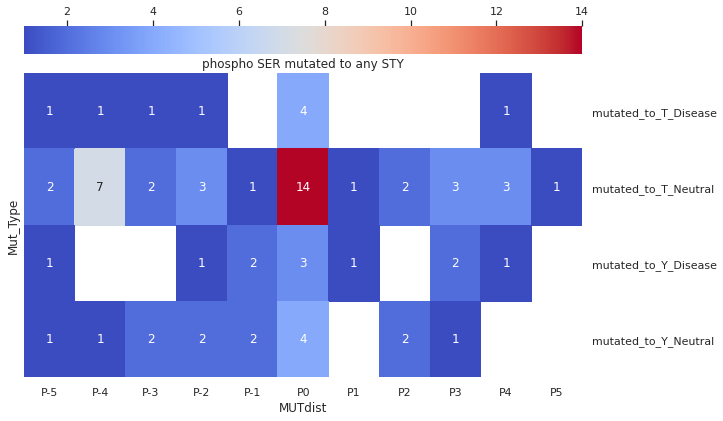

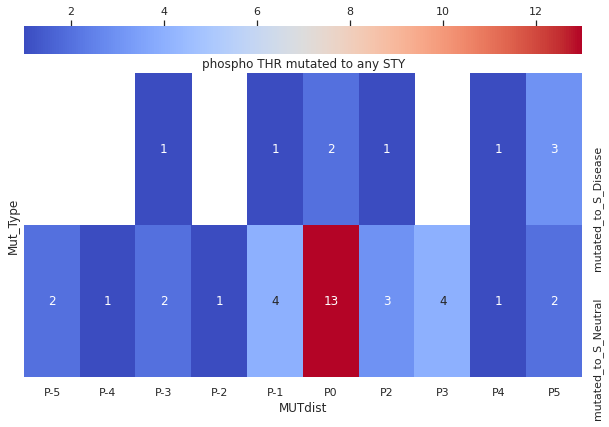

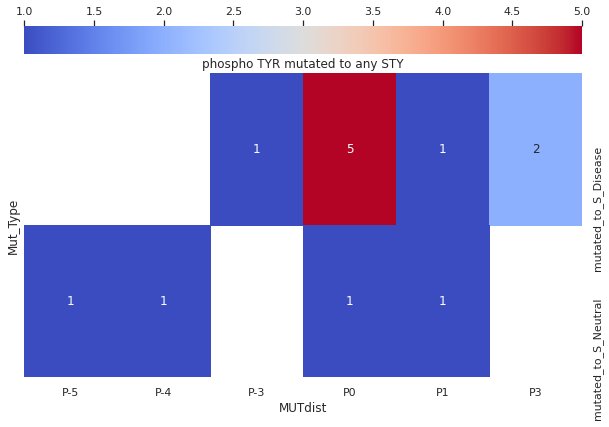

In [45]:
################################################# Phospho mutants to STY S>T,Y: T>S,Y: Y>S,T
mutPTMadjall=mutPTMadj
mutPTMadjall['MUTdist']=mutPTMadjall['MUT_POS']-mutPTMadjall['PTM_POS']

##now add 'P' in front
mutPTMadjall['MUTdist']='P'+mutPTMadjall['MUTdist'].astype('str')

SER_to_STY=mutPTMadjall[mutPTMadjall['AA_Ref'].isin(['S'])] # Ser mutated to S,T, or Y
SER_to_STY=SER_to_STY[SER_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
SER_to_STY=SER_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

SER_to_STY=SER_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
SER_to_STY['Mut_Type']="mutated_to_"+SER_to_STY["AA_Alt"]+'_'+SER_to_STY["Type"]

SER_to_STY=SER_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
SER_to_STY = SER_to_STY[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(SER_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("phospho SER mutated to any STY")
#####################################################################################################################

THR_to_STY=mutPTMadjall[mutPTMadjall['AA_Ref'].isin(['T'])] # Thr mutated to S,T, or Y
THR_to_STY=THR_to_STY[THR_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
THR_to_STY=THR_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

THR_to_STY=THR_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
THR_to_STY['Mut_Type']="mutated_to_"+THR_to_STY["AA_Alt"]+'_'+THR_to_STY["Type"]

THR_to_STY=THR_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
THR_to_STY = THR_to_STY[['P-5','P-4','P-3','P-2','P-1','P0','P2','P3','P4','P5']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(THR_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("phospho THR mutated to any STY")
#####################################################################################################################

TYR_to_STY=mutPTMadjall[mutPTMadjall['AA_Ref'].isin(['Y'])] # Tyr mutated to S,T, or Y
TYR_to_STY=TYR_to_STY[TYR_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
TYR_to_STY=TYR_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

TYR_to_STY=TYR_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
TYR_to_STY['Mut_Type']="mutated_to_"+TYR_to_STY["AA_Alt"]+'_'+TYR_to_STY["Type"]

TYR_to_STY=TYR_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
TYR_to_STY = TYR_to_STY[['P-5','P-4','P-3','P0','P1','P3']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(TYR_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("phospho TYR mutated to any STY")



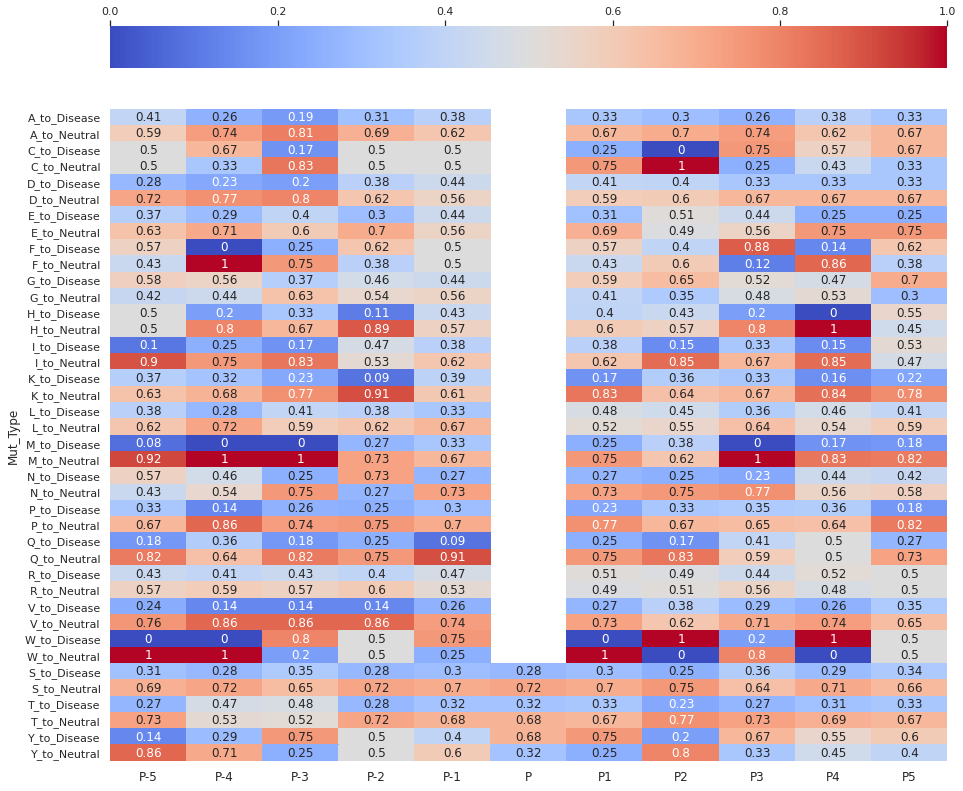

In [33]:
############################## Normalised at every two column (Every amino scid type for disease or neutral)
############################# Neutral or disease variant/Sum of neutral and disease variants
sns.set(style='whitegrid')

dftall=pd.read_csv('P_Mut_flankingsites.txt',sep='\t')

dftall=dftall[['Mut_Type','P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']]
dftall.columns=['Mut_Type','P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']

dftall=dftall.fillna('')
dftall[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']]=dftall[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']].apply(pd.to_numeric)
dftall=dftall.set_index('Mut_Type')
plt.figure(figsize=(15,15))
sns.heatmap(dftall.round(2),annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.tick_params(axis='x', labelsize=12,rotation=0)


# Mutation analysis at non-phosphorylation sites

In [22]:
NP_mut=pd.read_csv('nonPhos_mutations.txt',sep='\t')
###################################################### mutation distance '0' if direct-1 to +5 otherwise

NPmutPTMadj=NP_mut
## add column which shows the dstance from/to PTM
NPmutPTMadjall=NPmutPTMadj
NPmutPTMadjall['MUTdist']=NPmutPTMadjall['MUT_POS']-NPmutPTMadjall['PTM_POS']

##now add 'P' in front
NPmutPTMadjall['MUTdist']='P'+NPmutPTMadjall['MUTdist'].astype('str')
print (NPmutPTMadjall.shape)
################################ Eliminate duplicates for same AA_Alt and different AA_Erf but Type is same
NPmutPTMadjall=NPmutPTMadjall[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA_Alt info
print ("After duplicate elimination", NPmutPTMadjall.shape)

NPtableall=NPmutPTMadjall.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
NPtableall['Mut_Type']='towards'+'_'+NPtableall["AA_Alt"]+'_'+NPtableall["Type"]

NPdftall1=NPtableall.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
NPdftall = NPdftall1[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()
NPdftall.columns=['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']

print ("Direct Mutations on the central STY site",NPdftall['P'].sum())


(35875, 11)
After duplicate elimination (35237, 6)
Direct Mutations on the central STY site 2780.0


Text(0.5, 1.0, 'nonphospho TYR mutated to any STY')

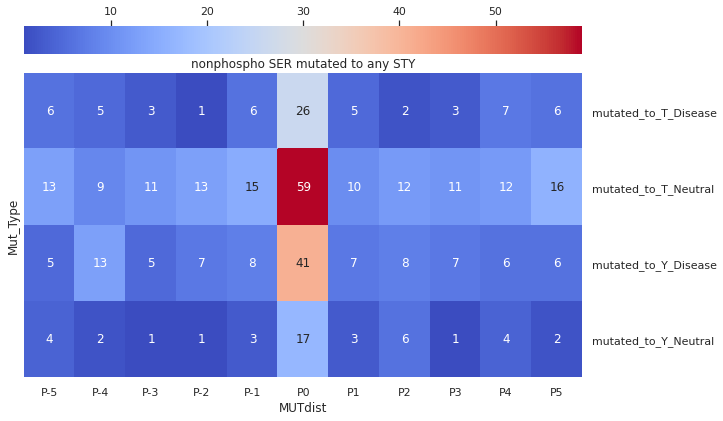

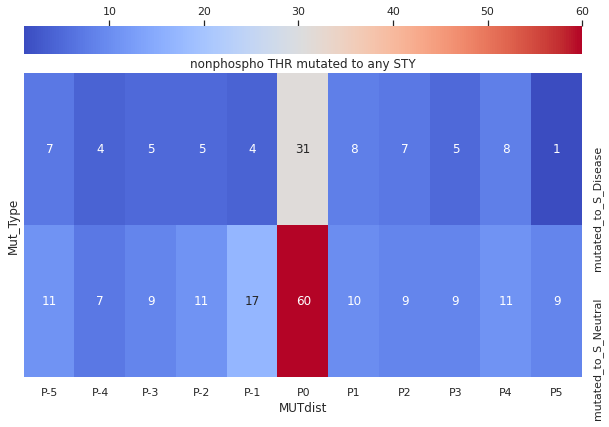

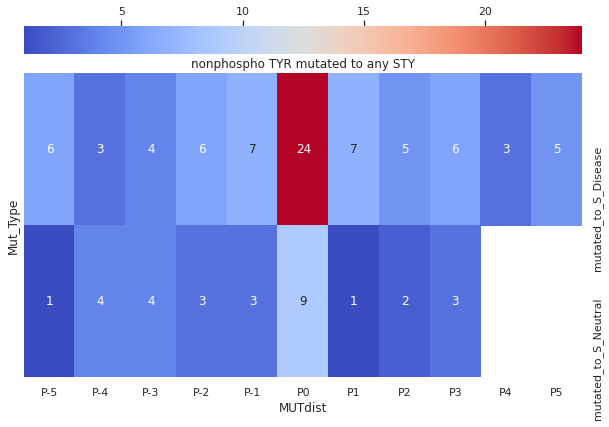

In [49]:
################################################# Phospho mutants to STY S>T,Y: T>S,Y: Y>S,T
NPmutPTMadjall=NPmutPTMadj
NPmutPTMadjall['MUTdist']=NPmutPTMadjall['MUT_POS']-NPmutPTMadjall['PTM_POS']

##now add 'P' in front
NPmutPTMadjall['MUTdist']='P'+NPmutPTMadjall['MUTdist'].astype('str')

SER_to_STY=NPmutPTMadjall[NPmutPTMadjall['AA_Ref'].isin(['S'])] # Ser mutated to S,T, or Y
SER_to_STY=SER_to_STY[SER_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
SER_to_STY=SER_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

SER_to_STY=SER_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
SER_to_STY['Mut_Type']="mutated_to_"+SER_to_STY["AA_Alt"]+'_'+SER_to_STY["Type"]

SER_to_STY=SER_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
SER_to_STY = SER_to_STY[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(SER_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("nonphospho SER mutated to any STY")
#####################################################################################################################

THR_to_STY=NPmutPTMadjall[NPmutPTMadjall['AA_Ref'].isin(['T'])] # Thr mutated to S,T, or Y
THR_to_STY=THR_to_STY[THR_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
THR_to_STY=THR_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

THR_to_STY=THR_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
THR_to_STY['Mut_Type']="mutated_to_"+THR_to_STY["AA_Alt"]+'_'+THR_to_STY["Type"]

THR_to_STY=THR_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
THR_to_STY = THR_to_STY[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(THR_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("nonphospho THR mutated to any STY")
#####################################################################################################################

TYR_to_STY=NPmutPTMadjall[NPmutPTMadjall['AA_Ref'].isin(['Y'])] # Tyr mutated to S,T, or Y
TYR_to_STY=TYR_to_STY[TYR_to_STY['AA_Alt'].isin(['S','T','Y'])]
################################ Elminitae duplicates for same AA_Ref but different AA_alt but Type is same
TYR_to_STY=TYR_to_STY[['PTM_POS','ACC_ID','MUT_POS','AA_Alt','Type','MUTdist']].drop_duplicates() #masks AA info

TYR_to_STY=TYR_to_STY.groupby(["AA_Alt","Type","MUTdist"]).size().reset_index(name="Freq")
TYR_to_STY['Mut_Type']="mutated_to_"+TYR_to_STY["AA_Alt"]+'_'+TYR_to_STY["Type"]

TYR_to_STY=TYR_to_STY.reset_index().pivot_table("Freq","Mut_Type","MUTdist")
TYR_to_STY = TYR_to_STY[['P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']].copy()

plt.figure(figsize=(10,7))
plt.tick_params(labelright=True, labeltop=False,labelleft=False, labelbottom=True)
sns.heatmap(TYR_to_STY,annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.title("nonphospho TYR mutated to any STY")



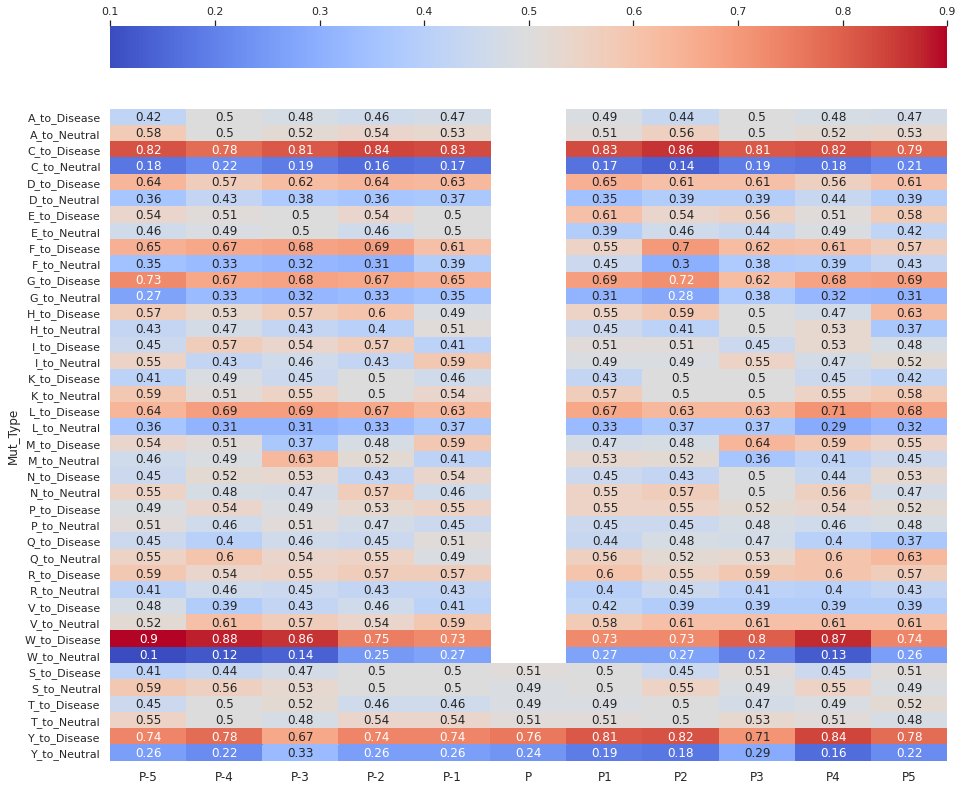

In [32]:
############################## Normalised at every two column (Every amino scid type for disease or neutral)
############################# Neutral or disease variant/Sum of neutral and disease variants
sns.set(style='whitegrid')

NPdftall=pd.read_csv('NP_Mut_flankingsites.txt',sep='\t')


NPdftall=NPdftall[['Mut_Type','P-5','P-4','P-3','P-2','P-1','P0','P1','P2','P3','P4','P5']]
NPdftall.columns=['Mut_Type','P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']


NPdftall=NPdftall.fillna('')
NPdftall[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']]=NPdftall[['P-5','P-4','P-3','P-2','P-1','P','P1','P2','P3','P4','P5']].apply(pd.to_numeric)
NPdftall=NPdftall.set_index('Mut_Type')

plt.figure(figsize=(15,15))
sns.heatmap(NPdftall.round(2),annot=True,cmap='coolwarm',cbar_kws = dict(use_gridspec=False,location="top"),fmt='g')
plt.tick_params(axis='x', labelsize=12,rotation=0)
